# Jonathan Halverson
# Monday, March 28, 2016
# Bayesian inference

### The general idea behind Bayesian inference is to form a prior distribution for the quantity of interest and then update this using new data and Bayes theorem to form a posterior distribution.

In [46]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

### Let's say we are asked to understand the probability of a coin giving heads, p. Maybe the real value of p is

In [47]:
p = 0.65

### We begin by assuming the coin is fair. This would correspond to a beta distribution with 50/50:

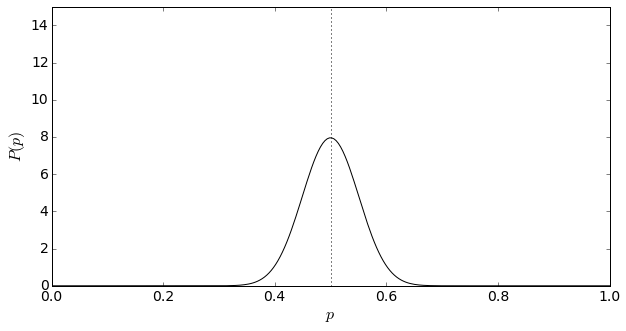

In [48]:
from scipy.stats import beta
x = np.linspace(0.0, 1.0, num=250)
plt.plot(x, beta.pdf(x, 50, 50), 'k-')
plt.plot([0.5, 0.5], [0, 15], 'k:')
plt.ylim(0, 15)
plt.xlabel(r'$p$')
plt.ylabel(r'$P(p)$')

### Now let's do an experiment by flipping the coin 100 times and then updating our distribution:

In [49]:
import random

heads = 0
tails = 0
flips = 100
for _ in xrange(flips):
    if (random.random() < p):
        heads += 1
    else:
        tails += 1
print heads / float(flips)

0.61


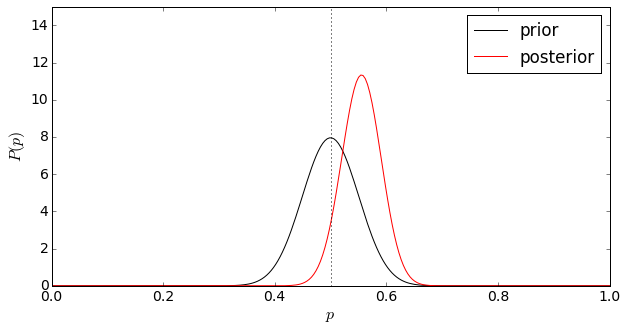

In [50]:
plt.plot(x, beta.pdf(x, 50, 50), 'k-', label='prior')
plt.plot(x, beta.pdf(x, 50 + heads, 50 + tails), 'r-', label='posterior')
plt.plot([0.5, 0.5], [0, 15], 'k:')
plt.ylim(0, 15)
plt.legend(loc='upper right')
plt.xlabel(r'$p$')
plt.ylabel(r'$P(p)$')

### Based on the prior and the observed data, there is only a 6.7% likelihood of p being between 0.49 and 0.51:

In [53]:
1.0 - beta.cdf(0.49, 50 + heads, 50 + tails) - (1.0 - beta.cdf(0.51, 50 + heads, 50 + tails)) 

0.067890138935858491

### Grus: Bayesian inference is somewhat controversial because of the subjective nature of choosing the prior.